In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import time

In [3]:
import os
os.chdir('..')
import rwpropa as rw

In [4]:
step_sizes = np.logspace(10, 14, 15)
crp_l = np.load('comparison/data/sim_result_crp_'+str(step_sizes[0]/10**11)+'_l.npy')
crp_kappa = np.load('comparison/data/sim_result_crp_'+str(step_sizes[0]/10**11)+'_kappa.npy')
kappa = np.mean(crp_kappa[-10:])
print(kappa)

FileNotFoundError: [Errno 2] No such file or directory: 'comparison/data/sim_result_crp_0.1_l.npy'

______________________________________________________________
simulate with a diffusion coefficient of  7.791645921201866e+22 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_1000.0.pkl
CPU times: user 59.3 ms, sys: 4.02 ms, total: 63.3 ms
Wall time: 60.2 ms
time needed:  0.06390074099999765 s
init statistics plotting class
______________________________________________________________
simulate with a diffusion coefficient of  7.791645921201866e+22 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file comparison/data/raw_data/rwpropa_610.5402296585314.pkl
CPU times: user 54.9 ms, sys: 0 ns, total: 54.9 ms
Wall time: 54.5 ms
time needed:  0.055623249000007036 s
init statistics plotting class
______________________________________________________________
simulate with a diffusion coefficient of  7.791645921201866e+22 m²/s
start simulation
Propagator initialized
Observer initialized
saved data f

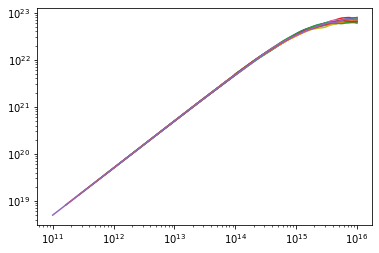

In [38]:
energy = 10**17
traj_max = 10**17

# test sim:
sim = rw.IsotropicSimulation(nr_particles = 10**2, energy = energy, step_size = 10**10, nr_steps = 10, diffusion_coefficient_para = kappa, nr_obs_steps = 1)
df_sim_data = pd.DataFrame(columns=('step_size', 'time', 'kappa'))

for i, step_size in enumerate(step_sizes[::-1]):
    print('______________________________________________________________')
    nr_steps = int(traj_max/step_size)
    sim = rw.IsotropicSimulation(nr_particles = 10**2, energy = energy, step_size = step_size, nr_steps = nr_steps, diffusion_coefficient_para = kappa, nr_obs_steps = 100)
    file_name = 'comparison/data/raw_data/rwpropa_'+str(step_size/10**11)
    start_time = time.process_time()
    %time sim.simulate(file_name)
    time_needed = time.process_time() - start_time
    print('time needed: ', time_needed, 's')
    df = pd.read_pickle(file_name+'.pkl')
    sta = rw.Statistics(df)
    df_kappas = sta.get_diffusion_coefficients()
    df_sim_data.loc[i] = [step_size, time_needed, np.mean(df_kappas['kappa'][-10:])]
    plt.plot(df_kappas['l'], (df_kappas['kappa']))
    file_name = 'comparison/data/sim_result_rwp_'
    np.save(file_name+str(step_size/10**11)+'_l.npy', np.array(df_kappas['l']))
    np.save(file_name+str(step_size/10**11)+'_kappa.npy', np.array(df_kappas['kappa']))

plt.loglog()
file_name_results = 'comparison/data/rwp_sim_data.pkl'
df_sim_data.to_pickle(file_name_results)

7.791645921201866e+22


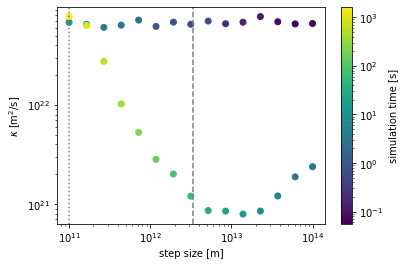

In [70]:
df_rwp_results = pd.read_pickle('comparison/data/rwp_sim_data.pkl')
df_crp_results = pd.read_pickle('comparison/data/crp_sim_data.pkl')
print(kappa_ref)
zs = np.concatenate([df_rwp_results['time'], df_crp_results['time']], axis=0)
min_, max_ = zs.min(), zs.max()
plt.scatter(df_rwp_results['step_size'], df_rwp_results['kappa'], c=df_rwp_results['time'], cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.clim(min_, max_)
plt.scatter(df_crp_results['step_size'], df_crp_results['kappa'], c=df_crp_results['time'], cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.clim(min_, max_)
plt.colorbar(label='simulation time [s]')
plt.loglog()
l_c = 10**11
r_g = l_c/1.6*53.4
plt.axvline(x=l_c, label='correlation length', color='grey', ls=':')
plt.axvline(x=r_g, label='gyroradius', color='grey', ls='--')

plt.xlabel('step size [m]')
plt.ylabel('$\kappa$ [m$^2$/s]')
plt.show()

7.791645921201866e+22


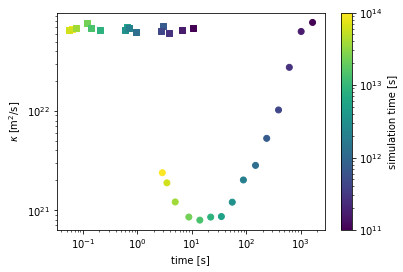

In [66]:
df_rwp_results = pd.read_pickle('comparison/data/rwp_sim_data.pkl')
df_crp_results = pd.read_pickle('comparison/data/crp_sim_data.pkl')
kappa_ref = np.array(df_crp_results['kappa'])[-1]
print(kappa_ref)
zs = np.concatenate([df_rwp_results['step_size'], df_crp_results['step_size']], axis=0)
min_, max_ = zs.min(), zs.max()
plt.scatter(df_rwp_results['time'], df_rwp_results['kappa'], c=df_rwp_results['step_size'], cmap='viridis', norm=matplotlib.colors.LogNorm(), marker='s')
plt.clim(min_, max_)
plt.scatter(df_crp_results['time'], df_crp_results['kappa'], c=df_crp_results['step_size'], cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.clim(min_, max_)
plt.colorbar(label='simulation time [s]')
plt.loglog()

plt.xlabel('time [s]')
plt.ylabel('$\kappa$ [m$^2$/s]')
plt.show()

7.791645921201866e+22


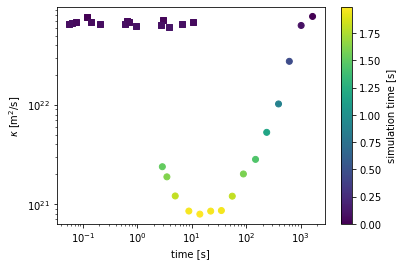

In [69]:
df_rwp_results = pd.read_pickle('comparison/data/rwp_sim_data.pkl')
df_crp_results = pd.read_pickle('comparison/data/crp_sim_data.pkl')
kappa_ref = np.array(df_crp_results['kappa'])[-1]
print(kappa_ref)
err_rwp = np.abs(np.log10(df_rwp_results['kappa'])-np.log10(kappa_ref))
err_crp = np.abs(np.log10(df_crp_results['kappa'])-np.log10(kappa_ref))
zs = np.concatenate([err_rwp, err_crp], axis=0)
min_, max_ = zs.min(), zs.max()
plt.scatter(df_rwp_results['time'], df_rwp_results['kappa'], c=err_rwp, cmap='viridis', marker='s')
plt.clim(min_, max_)
plt.scatter(df_crp_results['time'], df_crp_results['kappa'], c=err_crp, cmap='viridis')
plt.clim(min_, max_)
plt.colorbar(label='simulation time [s]')
plt.loglog()

plt.xlabel('time [s]')
plt.ylabel('$\kappa$ [m$^2$/s]')
plt.show()

7.791645921201866e+22


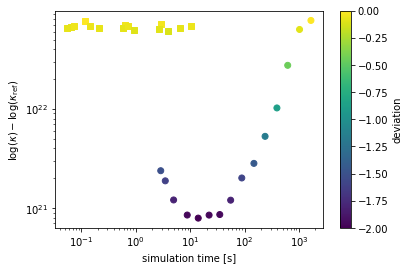

In [59]:
df_rwp_results = pd.read_pickle('comparison/data/rwp_sim_data.pkl')
df_crp_results = pd.read_pickle('comparison/data/crp_sim_data.pkl')
kappa_ref = np.array(df_crp_results['kappa'])[-1]
print(kappa_ref)
mini, maxi = -2, 0 
norm = plt.Normalize(mini, maxi)
plt.scatter(df_rwp_results['time'], df_rwp_results['kappa'], c=np.log10(df_rwp_results['kappa'])-np.log10(kappa_ref), norm=norm, cmap='viridis', marker='s')
plt.scatter(df_crp_results['time'], df_crp_results['kappa'], c=np.log10(df_crp_results['kappa'])-np.log10(kappa_ref), norm=norm, cmap='viridis')
plt.loglog()
plt.colorbar(label='deviation')
plt.xlabel('simulation time [s]')
plt.ylabel('$\log(\kappa) - \log(\kappa_\mathrm{ref})$')
plt.show()

### CRPropa simulations
Run **python3 sim.py** in the folder *rwpropa_project/rwpropa/comparison* to generate all relevant CRPropa files for the comparison test. The parameters should be similar to the RWPropa simulations, such as max_traj, diffusion coefficients, step_sizes.

No handles with labels found to put in legend.


[1.00000000e+10 1.93069773e+10 3.72759372e+10 7.19685673e+10
 1.38949549e+11 2.68269580e+11 5.17947468e+11 1.00000000e+12
 1.93069773e+12 3.72759372e+12 7.19685673e+12 1.38949549e+13
 2.68269580e+13 5.17947468e+13 1.00000000e+14]
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data


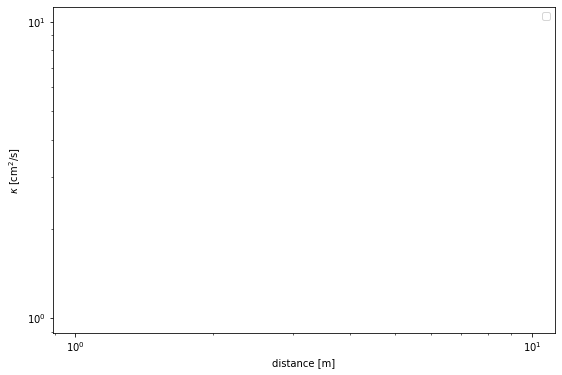

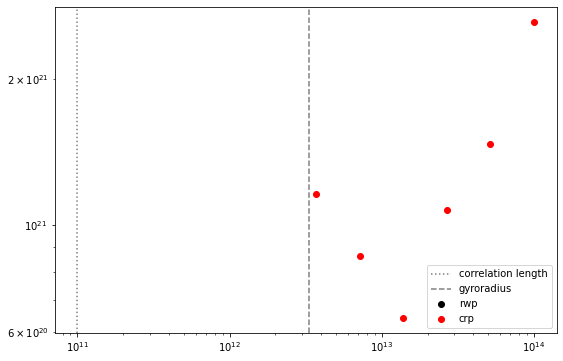

In [10]:
### load crpropa data

fig, ax1 = plt.subplots(figsize=(9,6))
kappas_crp = []
kappas_rwp = []
steps_crp = [] 
steps_rwp = []
print(step_sizes)
for i, step_size in enumerate(step_sizes):
    color = plt.cm.viridis(np.linspace(0, 1, len(step_sizes))[i])

    try:
        rwp_l = np.load('comparison/data/sim_result_rwp_'+str(step_size/10**11)+'_l.npy')
        rwp_kappa = np.load('comparison/data/sim_result_rwp_'+str(step_size/10**11)+'_kappa.npy')
        kappa = np.mean(rwp_kappa[-10:])
        kappas_rwp.append(kappa)
        steps_rwp.append(step_size)
        ax1.plot(rwp_l[:n_max], np.array(rwp_kappa[:n_max])*10**4, color=color, ls='--', label=str("rwp:  {:.2e}".format(step_size))+'m')
        print('data')
    except:
        print('no data')
    
    try:
        crp_l = np.load('comparison/data/sim_result_crp_'+str(step_size/10**11)+'_l.npy')
        crp_kappa = np.load('comparison/data/sim_result_crp_'+str(step_size/10**11)+'_kappa.npy')
        kappa = np.mean(crp_kappa[-10:])
        kappas_crp.append(kappa)
        steps_crp.append(step_size)
        ax1.plot(crp_l[:n_max], np.array(crp_kappa[:n_max])*10**4, color=color, ls='-', label=str("crp:  {:.2e}".format(step_size))+'m')
    except:
        print('no data')
        
ax1.set_xlabel('distance [m]')
ax1.loglog()
ax1.set_ylabel('$\kappa$ [cm$^2$/s]')
plt.legend()
#plt.xlim(10**12, 10**16)
#plt.ylim(6e24, 2e25)
plt.show()

fig, ax1 = plt.subplots(figsize=(9,6))
plt.scatter(steps_rwp, kappas_rwp, c='k', label='rwp')
plt.scatter(steps_crp, kappas_crp, c='r', label='crp')
l_c = 10**11
r_g = l_c/1.6*53.4
plt.axvline(x=l_c, label='correlation length', color='grey', ls=':')
plt.axvline(x=r_g, label='gyroradius', color='grey', ls='--')
ax1.loglog()
plt.legend()
plt.show()

[2.397224710096948e+22, 2.4576887213867624e+22, 2.3907257588304644e+22, 2.5845763385257043e+22, 2.6147872632653685e+22, 2.0260179044512502e+22, 7.321458076077947e+21, 4.1417174929634524e+21, 2.3040911330164086e+21, 1.3223085078672153e+21, 9.385747910553694e+20, 7.156882390932821e+20]
[0.0, 2.5222504605072755, 0.27110313184702184, 7.815355299803311, 9.075601142106619, 15.484856470993302, 69.458607508756, 82.7228650050251, 90.38850582796127, 94.48400267902403, 96.08474421650104, 97.01451334086933]


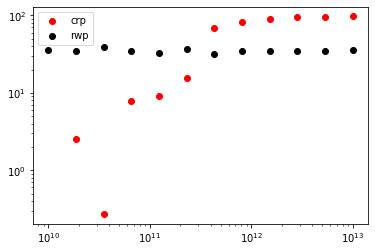

In [34]:
print(kappas_crp)
kappas_crp_err = []
kappas_rwp_err = []
kappa_ref = kappas_crp[0] # kappa for smallest step size
for kappa in kappas_crp:
    kappa_err = np.abs(kappa - kappa_ref)/kappa_ref*100
    kappas_crp_err.append(kappa_err)
   
print(kappas_crp_err)
for kappa in kappas_rwp:
    kappa_err = np.abs(kappa - kappa_ref)/kappa_ref*100
    kappas_rwp_err.append(kappa_err)
    
plt.scatter(steps_crp, kappas_crp_err, c='r', label='crp')
plt.scatter(steps_rwp, kappas_rwp_err, c='k', label='rwp')
plt.loglog()
plt.legend()
plt.show()